<a href="https://colab.research.google.com/github/rlohiya564/ANPR-Task/blob/main/cyborg_ANPR_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Checking the version of CUDA available

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


# 2.Installing and Importing the Dependencies

In [ ]:
!pip install easyocr

!pip install imutils

!pip install opencv-python-headless==4.1.2.30 

!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 10.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installat

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

# 3. Convert Coloured Image into Grayscale Format 

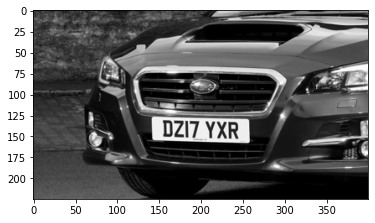

In [ ]:
img = cv2.imread('/content/Cars3.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB));

# 4.Applying Filter and Edge Detection

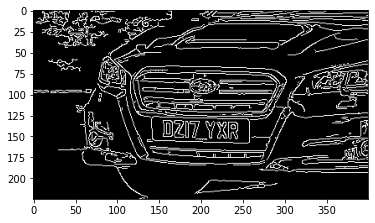

In [ ]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(bfilter,30,200) #Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB));

# 5.Finding Contours and Applying Mask

In [ ]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [ ]:
loc = None
for contour in contours:
  approx = cv2.approxPolyDP(contour,10,True) 
  if len(approx) == 4:
    loc = approx
    break

In [ ]:
loc

array([[[141, 129]],

       [[145, 155]],

       [[258, 157]],

       [[256, 129]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape,np.uint8)
new_img = cv2.drawContours(mask,[loc],0,255,-1)
new_img = cv2.bitwise_and(img,img,mask = mask)

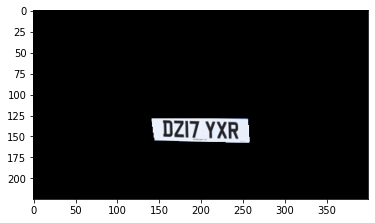

In [ ]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB));

In [ ]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

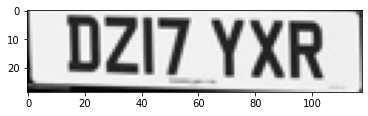

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB));

# 6.Using Easy OCR to Read Text

In [ ]:
reader = easyocr.Reader(['en'])
res = reader.readtext(cropped_img)
res

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[10, 0], [110, 0], [110, 29], [10, 29]], 'DZIZ YXR', 0.845488353598427)]

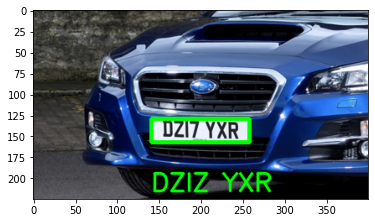

In [ ]:
text = res[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
fin_res = cv2.putText(img,text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font , fontScale = 1,color =(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
fin_res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(fin_res, cv2.COLOR_BGR2RGB));  